In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def initialize_weights(num_of_neurons):
    parameters = {}
    for i in range(1, len(num_of_neurons)):
        parameters["W" + str(i)] = np.random.randn(num_of_neurons[i], num_of_neurons[i-1])*0.01
        parameters["b" + str(i)] = np.zeros((num_of_neurons[i], 1))
    return parameters

In [3]:
def forward_propagation_step(a, w, b):
    assert w.shape[-1] == a.shape[0]
    assert w.shape[0] == b.shape[0]
    z = np.dot(w, a) + b
    return z, w, b, a

In [4]:
def sigmoid(z):
    a = 1/(1+np.exp(-z))
    return a

In [5]:
def relu(z):
    a = np.maximum(0, z)
    return a

In [6]:
def tanh(z):
    a = (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
    return a

In [120]:
# al_1: a[l-1]
def backward_propagation_sigmoid(dal, wl, zl, al_1):
    al = sigmoid(zl)
    dzl = dal*al*(1-al)
    dwl = np.dot(dzl, al_1.T)
    dbl = dzl
    dal_1 = np.dot(wl.T, dzl)
    return dal_1, dwl, dbl

In [186]:
def backward_propagation_relu(dal, wl, zl, al_1):
    al = relu(zl)
    dal_dzl = zl >= 0
    dal_dzl = dal_dzl.astype("int")
    dzl = dal*dal_dzl
    dwl = np.dot(dzl, al_1.T)
    dbl = dzl
    dal_1 = np.dot(wl.T, dzl)
    return dal_1, dwl, dbl

In [139]:
def backward_propagation_tanh(dal, wl, zl, al_1):
    al = tanh(zl)
    dzl = dal*(1-al**2)
    dwl = np.dot(dzl, al_1.T)
    dbl = dzl
    dal_1 = np.dot(wl.T, dzl)
    return dal_1, dwl, dbl

In [140]:
def backward_propagation(dal, wl, zl, al_1, act):
    if act == "sigmoid":
        return backward_propagation_sigmoid(dal, wl, zl, al_1)
    elif act == "relu":
        return backward_propagation_relu(dal, wl, zl, al_1)
    else:
        return backward_propagation_tanh(dal, wl, zl, al_1)

In [137]:
def activation(z, act):
    if act == "sigmoid":
        return sigmoid(z)
    elif act == "relu":
        return relu(z)
    else:
        return tanh(z)

In [198]:
def forward_progapate(parameters, X, num_of_layers):
    al = X
    cache = {}
    for l in range(1, num_of_layers):
        zl, wl, bl, al_1 = forward_propagation_step(al, parameters["W" + str(l)], parameters["b" + str(l)])
        al = activation(zl, "relu")
        cache["l" + str(l)] = [wl, zl, al_1]
    zl, wl, bl, al_1 = forward_propagation_step(al, parameters["W" + str(num_of_layers)], parameters["b" + str(num_of_layers)])
    al = activation(zl, "sigmoid")
    cache["l" + str(num_of_layers)] = [wl, zl, al_1]
    return al, cache

In [153]:
def cost(y_hat, y):
    m = y.shape[-1]
    J = -1/m*np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
    return J

In [197]:
def back_propagate(dal, cache, num_of_layers, m):
    grads = {}
    wl, zl, al_1 = cache["l" + str(num_of_layers)]
    dal, dwl, dbl = backward_propagation(dal, wl, zl, al_1, "sigmoid")
    grads["dW" + str(num_of_layers)] = dwl
    grads["db" + str(num_of_layers)] = dbl
    for l in reversed(range(1, num_of_layers)):
        wl, al, al_1 = cache["l" + str(l)]
        dal, dwl, dbl = backward_propagation(dal, wl, zl, al_1, "relu")
        grads["dW" + str(l)] = dwl
        grads["db" + str(l)] = dbl
    return grads

In [142]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower
    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
    X = X.T
    Y = Y.T
    return X, Y

In [143]:
X, Y = load_planar_dataset()

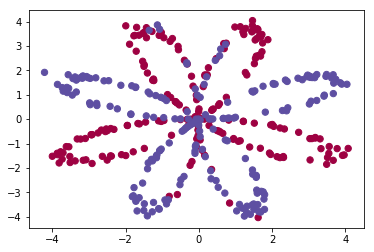

In [144]:
plt.scatter(X[0, :], X[1, :],c=Y.reshape(Y.shape[-1]), s=40, cmap=plt.cm.Spectral);

In [145]:
def update(parameters, grads, num_of_layers, learning_rate):
    for l in range(1, num_of_layers+1):
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * grads["db" + str(l)]
    return parameters

In [239]:
def train(X, Y, iters=10000, learning_rate = 0.01):
    losses = []
    dims = [2, 4, 1]
    num_of_layers = len(dims)-1
    parameters = initialize_weights(dims)
    for i in range(iters):
        A, cache = forward_progapate(parameters, X, num_of_layers)
        J = cost(A, Y)
        if i % 1000 == 0:
            print(J)
        losses.append(J)
        dzl = A - Y
        grads = back_propagate(dzl, cache, num_of_layers, 400)
        parameters = update(parameters, grads, num_of_layers, learning_rate)
    return parameters, losses

In [240]:
parameters, losses = train(X, Y)

0.6930939456832732
0.1465255013541906
0.08697596732597297
0.06578664373758339
0.054423989888698045
0.04717949455885705
0.042086317293742306
0.03827259009696135
0.035288275520414095
0.03287580004171362


[Text(0, 0.5, 'loss'), Text(0.5, 0, 'iteration')]

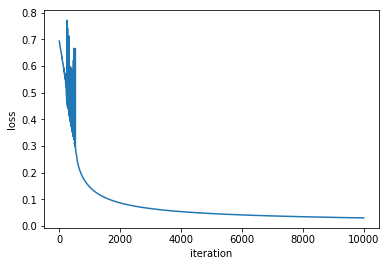

In [242]:
fig, ax = plt.subplots()
ax.plot(range(10000), losses)
ax.set(xlabel='iteration', ylabel='loss')

In [243]:
def predict(parameters, X):
    num_of_layers = int(len(parameters.keys()) / 2)
    y_hat, cache = forward_progapate(parameters, X, num_of_layers)
    y_hat = y_hat >= 0.5
    y_hat = y_hat.astype("int")
    return y_hat

In [244]:
y_hat = predict(parameters, X)

In [245]:
acc = y_hat == Y
acc = acc.astype("int")
acc = np.sum(acc) / acc.shape[-1]

In [246]:
acc

1.0